# <center> Trabajo 1 
## <center> **$Punto \ 2. \ Solución \ de \ ecuaciones \ de \ una \ variable$**
<br>  
<center> Juan Diego Alvarez Perdomo <br /> Juliana Carvajal Guerra <br /> Oriana Mejía Cardona
<br>  

<center><img src="https://raw.githubusercontent.com/jda-21/metPy/master/IMG/Escudo%20UDEA.png" width = "200px">
<br>

<center> Programación y métodos numéricos <br /> Facultad de Ingeniería <br /> Departamento de Ingeniería Mecánica <br /> Universidad de Antioquia <br /> Medellín
 <center> Enero de 2021

   
--------------------------------------------------------------
    

# *$ Enunciado $*
Un contenedor semi-cilíndrico de longitud *L* tiene sección de semi-círculo con radio *r*. Cuando se llena de agua hasta una distancia *h* del borde superior, el volumen de agua, *V*, es: 
<center>  $V = L[ 0.5 \pi r^2 - r^2 sin^{-1}(\frac {h} {r}) - h \sqrt [2]{r^2 - h^2} ] $
<center><img src="https://raw.githubusercontent.com/jda-21/metPy/master/IMG/Tanque.png" width = "400px">

<center>Para resolver la ecuación utilizamos: 

<center>$L = 0.60m$ , $r = 0.80m$ , $V = 0.241 m^3$.

<center>Y una tolerancia de $1 x 10^-8$

# $Contenido$
En este cuardeno se soluciona la ecuación mediante diferentes métodos buscando hallar el más eficiente. Primero se útiliza el método gráfico para para hallar la raíz, esta se utilizará para fijar el intervalo en los métodos cerrados ( Método de bisección y Método de la posición falsa) y el valor semilla en los métodos abiertos (Método de iteración simple de punto fijo y Método de Newton - Rhapson). 

Finalmente, se hace un gráfico comparativo de los errores relativos de los diferentes métodos y se realiza un análisis. 

In [ ]:
# Importación de librerías
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_png

In [ ]:
# Se asignan valores a los parámetros
L = 0.6     # [m]
r = 0.8     # [m]
V = 0.241     # [m3]

# Método gráfico

In [ ]:
Incr = 0.01
h = np.arange(0, 0.8 + Incr, Incr)
V_h = L * ((0.5 * np.pi * (r**2)) - (r**2 * np.arcsin(h/r)) - (h * np.sqrt((r**2) - (h**2)))) - V     # Función para el volumen que depende de h.
eje_x = np.zeros(len(h))

In [ ]:
alto = 400     # Dimensiones para la gráfica.
ancho = int(alto*1.618)     # Dimensiones para la gráfica.
p = figure(plot_width=ancho, plot_height=alto, x_axis_label='h [m]',y_axis_label='V_h [m^3]', title='Volumen en función de h', x_range=[0,0.8])     # Se asignan nombres a la gráfica y a los ejes.
p.line(h, V_h, line_width=2, legend_label='V_h')     # Se grafica la función y se nombra su leyenda.
p.line(h, eje_x, line_width=2, line_color='black', legend_label='y = 0')     # Se grafica la línea equivalente al eje x y se nombra su leyenda.

show(p)     # Se muestra la gráfica



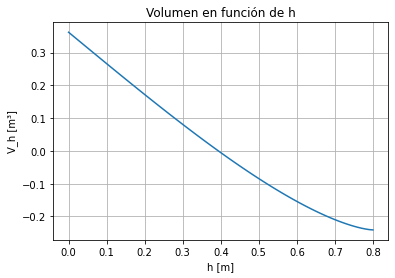

In [ ]:
fig, ax = plt.subplots()
ax.plot(h, V_h)

ax.set(xlabel='h [m]', ylabel='V_h [m³]',
       title='Volumen en función de h')
ax.grid()

#fig.savefig("posicion.png")
plt.show()


De la gráfica se observa que cuando el volumen del agua $V$ es $241$ $L$, la distancia $h$ es $0.393827318$ $m$.

<center><img src="https://raw.githubusercontent.com/jda-21/metPy/master/IMG/Raíz.png" align = "left" width = "500px" >



#  *$ Métodos \ cerrados $*

## $Método \ de \ bisección$

In [ ]:
h_ = 0.393827318     # Raíz hallada por el método gráfico.
a = h_ - 0.02     # Límite inferior.
b = h_ + 0.02     # Límite superior.
N_it_max = 50     # Número máximo de iteraciones.
tol = 1e-08     # Tolerancia.

In [ ]:
N_it = 0     # Se inicia la variable que almacenará el número de iteraciones.
p = 0     # Se inicia la variable que corresponderá a las aproximaciones de la raíz.
error = 1
V_h = 'L * ((0.5 * np.pi * (r**2)) - (r**2 * np.arcsin(h/r)) - (h * np.sqrt((r**2) - (h**2)))) - V'     # Función.
h = a; V_a = eval(V_h)     # Se evalúa la función en el límite inferior.
h = b; V_b = eval(V_h)     # Se evalúa la función en el límite superior.
list_error_bis = []     # Se crea una lista para almacenar el error relativo de cada iteración.

if (V_a * V_b < 0):     # Se verifica que la función cambia de signo en el intervalo.
  while (error > tol and N_it <= N_it_max):     # Se establece que el bucle se repita mientras el número de iteraciones no supere el máximo y el error sea mayor que la tolerancia.
    p_0 = p
    p = (a + b) / 2     # Se divide el intervalo en dos subintervalos iguales para obtener la aproximación de la raíz.
    h = p; V_p = eval(V_h)     # Se evalúa la función en la aproximación.
    if (V_a * V_p < 0):     # Se verifica si la raíz está en el subintervalo izquierdo.
      b = p     # Se establece el nuevo límite superior.
    elif (V_a * V_p > 0):     # Se verifica si la raíz está en el subintervalo derecho.
      a = p     # Se establece el nuevo límite inferior.
    else:
      N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
      error = 0
      break     # Se rompe el bucle cuando se llega a la raíz.
    h = a; V_a = eval(V_h)     # Se evalúa la función en el límite inferior.
    h = b; V_b = eval(V_h)     # Se evalúa la función en el límite superior.
    error = np.abs((p - p_0) / p)     # Se calcula el error relativo aproximado.
    list_error_bis.append(error)     # Se almacena el error relativo aproximado.
    N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
  if (N_it >= N_it_max):     # Se verifica si se superó el número máximo de iteraciones.
    print('Se alcanzó el máximo número de iteraciones sin hallar solución')
  else:
    raiz = p     # Se asigna el valor de la mejor aproximación a la variable raíz.
    print('El valor de la raíz es: ', raiz , '[m]')
    print('Se realizaron', N_it, 'iteraciones')
    print('El error relativo aproximado es: {:.2e}'.format(error))
else:
  print('Debe redefinir el intervalo de cálculo')

El valor de la raíz es:  0.3938176978103332 [m]
Se realizaron 24 iteraciones
El error relativo aproximado es: 6.05e-09


## $Método \ de \ la \ posición \ falsa$

In [ ]:
h_ = 0.393827318     # Raíz hallada por el método gráfico
a = h_ - 0.02     # Límite inferior
b = h_ + 0.02     # Límite superior
N_it_max = 20     # Número máximo de iteraciones
tol = 1e-08     # Tolerancia.

In [ ]:
N_it = 0    # Se inicia la variable que almacenará el número de iteraciones.
p = 0     # Se inicia la variable que corresponderá a las aproximaciones de la raíz.
error = 1
V_h = 'L * ((0.5 * np.pi * (r**2)) - (r**2 * np.arcsin(h/r)) - (h * np.sqrt((r**2) - (h**2)))) - V'     # Función.
h = a; V_a = eval(V_h)     # Se evalúa la función en el límite inferior.
h = b; V_b = eval(V_h)     # Se evalúa la función en el límite superior.
list_error_pos = []     # Se crea una lista para almacenar el error relativo de cada iteración.

if (V_a * V_b < 0):     # Se verifica que la función cambia de signo en el intervalo.
  while (error > tol and N_it <= N_it_max):     # Se establece que el bucle se repita mientras el número de iteraciones no supere el máximo y el error sea mayor que la tolerancia.
    p_0 = p
    p = b - (V_b * (a - b)) / (V_a - V_b)    # Se divide el intervalo en dos subintervalos para obtener la aproximación de la raíz.
    h = p; V_p = eval(V_h)     # Se evalúa la función en la aproximación.
    if (V_a * V_p < 0):     # Se verifica si la raíz está en el subintervalo izquierdo.
      b = p     # Se establece el nuevo límite superior.
    elif (V_a * V_p > 0):     # Se verifica si la raíz está en el subintervalo derecho.
      a = p     # Se establece el nuevo límite inferior.
    else:
      N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
      error = 0
      break     # Se rompe el bucle cuando se llega a la raíz.
    h = a; V_a = eval(V_h)     # Se evalúa la función en el límite inferior.
    h = b; V_b = eval(V_h)     # Se evalúa la función en el límite superior.
    error = np.abs((p - p_0) / p)     # Se calcula el error relativo aproximado.
    list_error_pos.append(error)     # Se almacena el error relativo aproximado.
    N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
  if (N_it >= N_it_max):     # Se verifica si se superó el número máximo de iteraciones.
    print('Se alcanzó el máximo número de iteraciones sin hallar solución')
  else:
    raiz = p     # Se asigna el valor de la mejor aproximación a la variable raíz.
    print('El valor de la raíz es: ', raiz, '[m]')
    print('Se realizaron', N_it, 'iteraciones')
    print('El error relativo aproximado es: {:.2e}'.format(error))
else:
  print('Debe redefinir el intervalo de cálculo')

El valor de la raíz es:  0.39381769918332143 [m]
Se realizaron 5 iteraciones
El error relativo aproximado es: 2.00e-10


# **$Métodos \ abiertos$**

## $Método \ de \ iteración \ simple \ de \ punto \ fijo$

In [ ]:
h_ = 0.393827318     # Raíz hallada por el método gráfico
h0 = h_ - 0.02     # Valor semilla
N_it_max = 50     # Número máximo de iteraciones
tol = 1e-08     # Tolerancia.

In [ ]:
N_it = 0    # Se inicia la variable que almacenará el número de iteraciones.
error = 1
list_error_punt = []     # Se crea una lista para almacenar el error relativo de cada iteración.
V_h = 'L * ((0.5 * np.pi * (r**2)) - (r**2 * np.arcsin(h/r)) - (h * np.sqrt((r**2) - (h**2)))) - V + h'     # Función.
while (error > tol and N_it <= N_it_max):     # Se establece que el bucle se repita mientras el número de iteraciones no supere el máximo y el error sea mayor que la tolerancia.
  h = h0; p = eval(V_h)     # Se calcula la aproximación de la raíz.
  error = np.abs((p - h) / p)     # Se calcula el error relativo aproximado.
  list_error_punt.append(error)     # Se almacena el error relativo aproximado.
  N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
  h0 = p
if (N_it >= N_it_max):     # Se verifica si se superó el número máximo de iteraciones.
  print('Se alcanzó el máximo número de iteraciones sin hallar solución')
else:
  raiz = p     # Se asigna el valor de la mejor aproximación a la variable raíz.
  print('El valor de la raíz es: ', raiz, '[m]')
  print('Se realizaron', N_it, 'iteraciones')
  print('El error relativo aproximado es: {:.2e}'.format(error))

El valor de la raíz es:  0.39381769890857365 [m]
Se realizaron 10 iteraciones
El error relativo aproximado es: 3.54e-09


## $Método \ de \ Newton-Raphson $

In [ ]:
h_ = 0.393827318 # Raíz hallada por el método gráfico
h0 = h_ - 0.02 # Valor semilla
N_it_max = 20     # Número máximo de iteraciones
tol = 1e-08     # Tolerancia.

In [ ]:
N_it = 0    # Se inicia la variable que almacenará el número de iteraciones.
error = 1
list_error_New = []     # Se crea una lista para almacenar el error relativo de cada iteración.
V_h = 'L * ((0.5 * np.pi * (r**2)) - (r**2 * np.arcsin(h/r)) - (h * np.sqrt((r**2) - (h**2)))) - V'     # Función.

while (error > tol and N_it <= N_it_max):     # Se establece que el bucle se repita mientras el número de iteraciones no supere el máximo y el error sea mayor que la tolerancia.
  h = h0
  D_h = 0.001 * h
  h = h0 + D_h; V_h0_Dh = eval(V_h)
  h = h0 - D_h; V_h0_Dh_ = eval(V_h)
  der_h0 = (V_h0_Dh - V_h0_Dh_) / (2 * D_h)     # Se calcula la derivada en el punto.
  h = h0; V_h0 = eval(V_h)
  p = h - (V_h0 / der_h0)    # Se calcula la aproximación mejorada de la raíz.
  error = np.abs((p - h) / p)     # Se calcula el error relativo aproximado.
  list_error_New.append(error)     # Se almacena el error relativo aproximado.
  N_it = N_it + 1     # Se agrega una unidad al número de iteraciones.
  h0 = p
if (N_it >= N_it_max):     # Se verifica si se superó el número máximo de iteraciones.
  print('Se alcanzó el máximo número de iteraciones sin hallar solución')
else:
  raiz = p     # Se asigna el valor de la mejor aproximación a la variable raíz.
  print('El valor de la raíz es: ', raiz, '[m]')
  print('Se realizaron', N_it, 'iteraciones')
  print('El error relativo aproximado es: {:.2e}'.format(error))

El valor de la raíz es:  0.3938176991826961 [m]
Se realizaron 4 iteraciones
El error relativo aproximado es: 1.41e-15


# *$Gráfico \ comparativo$*

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


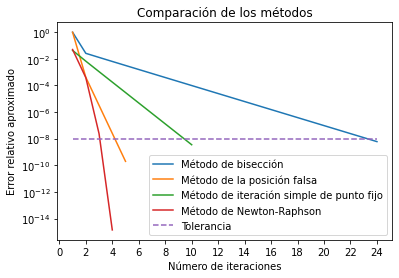

In [ ]:
x_1 = np.arange(1,len(list_error_bis)+1,1)
x_2 = np.arange(1,len(list_error_pos)+1,1)
x_3 = np.arange(1,len(list_error_punt)+1,1)
x_4 = np.arange(1,len(list_error_New)+1,1)
tol = np.full(24,tol)

fig, ax = plt.subplots()
ax.plot(x_1,list_error_bis,label='Método de bisección')    # Se traza una línea que representa el error relativo aproximado del Método de bisección.
ax.plot(x_2,list_error_pos, label = 'Método de la posición falsa')    # Se traza una línea que representa el error relativo aproximado del Método de la posición falsa.
ax.plot(x_3, list_error_punt, label = 'Método de iteración simple de punto fijo')    # Se traza una línea que representa el error relativo aproximado del Método de iteración simple de punto fijo.
ax.plot(x_4, list_error_New, label = 'Método de Newton-Raphson')    # Se traza una línea que representa el error relativo aproximado del Método de Newton-Raphson.
ax.plot(x_1, tol,'--', label = 'Tolerancia')    # Se traza una línea que representa el error máximo permitido.
ax.set_yscale('log')    # Se establece el eje y en escala logarítmica.
ax.set_xlabel('Número de iteraciones', fontname='Times New Roman')     # Se nombra el eje x.
ax.set_ylabel('Error relativo aproximado', fontname='Times New Roman')     # Se nombra el eje y.
ax.xaxis.set_ticks(np.arange(0, 26, 2))
ax.set_title('Comparación de los métodos', fontname='Times New Roman')     # Se nombra la gráfica.
ax.legend()     # Se establece que se muestren las leyendas.

### $Conclusiones.$

* Podemos observar que la raíz obtenida con cada método no varia mucho, tanto en los métodos cerrados como en los abiertos. Además podemos apreciar que los métodos con más iteraciones tienen un error relativo mayor. 

  Haciendo un análisis en general de los métodos, notamos que en los métodos cerrados se encuentra el método menos eficiente, con el  mayor error relativo y cantidad de iteraciones, este es el método de bisección, con un error de $6.05x10^{-09}$ y 24 iteraciones, estando éste por encima del menos eficiente de los métodos abiertos, siendo este el método de iteración simple de punto fijo con un error relativo de $3.54x10^{-09}$ y 10 iteraciones. En los métodos abiertos también encontramos el método más eficiente, no sólo por presentar el error relativo más pequeño, de $1.41x10^{-15}$, sino también porque tan solo realizó 4 iteraciones, este fue el método de Newton Rhapson, pero en los métodos cerrados también tenemos el método de posición falsa que realizando tan solo 5 iteraciones tuvo un error relaivo de $2.00x10^{-10}$ el cual muestra ser bastante eficiente.

* Además, con los demás métodos se comprobó que la aproximación obtenida mediante el método gráfico es de buena exactitud, a pesar de lo "sencillo" del método, por lo cual es bastante útil como valor semilla o para considerar intervalos.





